In [1060]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import zscore, norm
import numpy as np
import seaborn as sns
import time

print(pd.__version__) #1.2.4
print(sns.__version__) #0.11.1


current_path = os.getcwd()
save_to_path = os.path.join(current_path,'presentazione/pictures')

1.2.4
0.11.1


In [1061]:
# !!!! 'data_challenge.xlsx' and this ipynb must be located at the same path !!!
data_challenge_file = os.path.join(current_path, 'data_challenge.xlsx')
CAL500_xlsx = pd.read_excel(data_challenge_file, sheet_name=0) #takes 8.3s
VAL_HSI_xlsx = pd.read_excel(data_challenge_file, sheet_name=1)  #takes 2m50.2s

CAL500 = CAL500_xlsx
VAL_HSI = VAL_HSI_xlsx

# #################################### #
# conversion in csv to save time #
###################################### #

# CAL500_xlsx.to_csv(os.path.join(current_path, 'CAL500.csv'))
# VAL_HSI_xlsx.to_csv(os.path.join(current_path, 'VAL_HSI.csv'))  
# CAL500_csv = pd.read_csv(os.path.join(current_path, 'CAL500.csv'))
# VAL_HSI_csv = pd.read_csv(os.path.join(current_path, 'VAL_HSI.csv'))
# CAL500 = CAL500_csv
# VAL_HSI = VAL_HSI_csv

In [1062]:
# remove 'Unnamed:1' from VAL_HSI and check presence of null values
null_CAL500 = CAL500.isnull().sum().sum()
null_VAL_HSI = VAL_HSI.drop('Unnamed: 1', axis=1).isnull().sum().sum()
print('Number of null values for the two datasets:')
print('CAL500 {:}\nVAL_HSI {:}'.format(null_CAL500, null_VAL_HSI))

Number of null values for the two datasets:
CAL500 0
VAL_HSI 0


/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.11.1


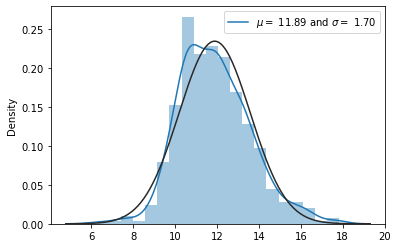

In [1063]:
# check distribution of the dependent variable yref (graphically only for this one)
(mu, sigma) = norm.fit(CAL500['Yref'])
sns.distplot(CAL500[['Yref']], bins=20, fit = norm)
plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)], loc='best')
plt.savefig(os.path.join(save_to_path,'distribution_plot_yref.pgf'))

print(sns.__version__)
# seaborn version 0.11.1 
# !!! seaborn.distplot is deprecated in future versions !!! 
# in case, use displot and remove fit parameter

In [1065]:
# statistic of data 
distribution_data = pd.DataFrame(columns=CAL500.keys())
for i in CAL500.keys():
    distribution_data.at['Mean', i] = CAL500[i].mean()
    distribution_data.at['Median', i] = CAL500[i].median()
    distribution_data.at['Mean-Median', i] = CAL500[i].mean()-CAL500[i].median()
    distribution_data.at['Kurtosis', i] = CAL500[i].kurtosis() # Fisher’s definition of kurtosis 
    distribution_data.at['Skewness', i] = CAL500[i].skew() 

# printing the statistic of 4 (random) independent variables (can be different at each run, can be different from what is reported in the presentation)
distribution_data.sample(n=4, axis=1)
# distribution_data.to_latex(os.path.join(save_to_path,'distribution_tab_4_random.tex'))

,1540,2162,1580,2080
Mean,0.282999,0.427808,0.272822,0.454863
Median,0.282521,0.427219,0.272387,0.454072
Mean-Median,0.000478,0.00059,0.000436,0.000791
Kurtosis,1.906535,1.686699,1.986494,1.93027
Skewness,0.686164,0.582591,0.719446,0.645512


In [1066]:
# the data can be considered within the limits of what defines a normal (Gaussian) distribution, therefore outliers are searched with zscore
z_scores = zscore(CAL500)
filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
CAL500_no_ol = CAL500[filtered_entries]

In [1067]:
# statistic of data w/o outliers
distribution_data_no_ol = pd.DataFrame(columns=CAL500_no_ol.keys())
for i in CAL500_no_ol.keys():
    distribution_data_no_ol.at['Mean', i] = CAL500_no_ol[i].mean()
    distribution_data_no_ol.at['Median', i] = CAL500_no_ol[i].median()
    distribution_data_no_ol.at['Mean-Median', i] = CAL500_no_ol[i].mean()-CAL500_no_ol[i].median()
    distribution_data_no_ol.at['Kurtosis', i] = CAL500_no_ol[i].kurtosis() #using fisher definition
    distribution_data_no_ol.at['Skewness', i] = CAL500_no_ol[i].skew() 
    # cor_no_ol = CAL500_no_ol.corr(method='pearson')-CAL500_no_ol.corr(method='spearman')
    
distribution_data_no_ol.sample(n=4, axis=1)
# distribution_data_no_ol.to_latex(os.path.join(save_to_path,'distribution_tab_4_random_no_ol.tex'))

,1364,1232,2348,2438
Mean,0.131497,0.097352,0.484582,0.562695
Median,0.131455,0.097238,0.485642,0.563335
Mean-Median,0.000043,0.000114,-0.00106,-0.00064
Kurtosis,0.14791,0.571892,-0.038008,-0.063455
Skewness,0.283007,0.341478,0.06727,0.11269


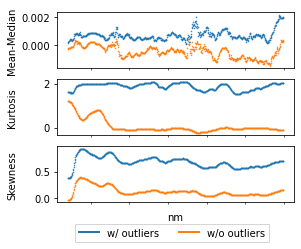

In [1070]:
# graphic comparision of statistic with and without outliers
fig, axes = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(w=4.25279, h=3.5) # retrieved from beamer 

fig.align_ylabels(axes)

for i in [0,1]:   
    axes[i].set_xticks([])

axes[0].set_ylabel('Mean-Median')
distribution_data.drop(['Yref'], axis=1).loc['Mean-Median'].plot(marker='.',markersize=1, linestyle='none', ax=axes[0])
axes[1].set_ylabel('Kurtosis')
distribution_data.drop(['Yref'], axis=1).loc['Kurtosis'].plot(marker='.',markersize=1, linestyle='none', ax=axes[1])
axes[2].set_ylabel('Skewness')
axes[2].set_xlabel('nm')
distribution_data.drop(['Yref'], axis=1).loc['Skewness'].plot(marker='.',markersize=1, linestyle='none', ax=axes[2])
distribution_data_no_ol.drop(['Yref'], axis=1).loc['Mean-Median'].plot(marker='.',markersize=1, linestyle='none', ax=axes[0])
distribution_data_no_ol.drop(['Yref'], axis=1).loc['Kurtosis'].plot(marker='.',markersize=1, linestyle='none', ax=axes[1])
distribution_data_no_ol.drop(['Yref'], axis=1).loc['Skewness'].plot(marker='.',markersize=1, linestyle='none', ax=axes[2])

legend_lines = [Line2D([0], [0], color='tab:blue', lw=2),
                Line2D([0], [0], color='tab:orange', lw=2)]

fig.legend(legend_lines, ['w/ outliers', 'w/o outliers'], loc='upper center', 
             bbox_to_anchor=(0.5, 0.06),fancybox=False, shadow=False, ncol=2) #0.08

plt.savefig(os.path.join(save_to_path,'statistic_plot.pgf'))


In [1103]:
# preparare data and split in training and test samples for model implementation
import sklearn 
print(sklearn.__version__) #1.1.1
from sklearn.model_selection import train_test_split 


X = CAL500.drop(['Yref'], axis=1) 
y = CAL500['Yref']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
# On the total, 30% of the dataset is reserved for evaluation 
# while a true random_state is used to have a deterministic splitting (debugging purposes) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# w/o outliers 
X_no_ol = CAL500_no_ol.drop(['Yref'], axis=1) 
y_no_ol = CAL500_no_ol['Yref']

X_train_no_ol, X_test_no_ol, y_train_no_ol, y_test_no_ol = train_test_split(X_no_ol, y_no_ol, test_size=0.3, random_state=99)

print(X_train_no_ol.shape)
print(X_test_no_ol.shape)
print(y_train_no_ol.shape)
print(y_test_no_ol.shape)

1.1.1
(350, 700)
(150, 700)
(350,)
(150,)
(339, 700)
(146, 700)
(339,)
(146,)


In [1104]:
# Load the models and the metrics functions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [1105]:
# Instantiating the model using the Gridsearch function to get the best parameters (only for tunable models)
param_SVR = {'C': [0.1, 1, 10, 100, 1000, 10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
              'kernel': ['rbf']}
SVR_opt = GridSearchCV(SVR(), param_SVR, refit=True, verbose=1)

param_RF = {'n_estimators': [25,50,100,150,200,250,300,400]}
RF_opt = GridSearchCV(RandomForestRegressor(), param_RF, refit=True, verbose=0)

param_BR = {'n_estimators': [25,50,100,150,200,250,300,400]}
BR_opt = GridSearchCV(BaggingRegressor(), param_BR, refit = True, verbose = 0)

param_GBR = {'n_estimators': [25,50,100,150,200,250,300,400]}
GBR = GridSearchCV(GradientBoostingRegressor(), param_GBR, refit = True, verbose = 0)

SR = StackingRegressor(estimators=[('ridge', Ridge()), ('svr', SVR_opt)])

In [1107]:
# to save time later (used later)
Best_parameters_SVR = SVR_opt.fit(X_train, y_train)
Best_parameters_SVR.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}

In [1108]:
models = [
    LinearRegression(), 
    Ridge(), 
    Lasso(), 
    SVR(C=Best_parameters_SVR.best_params_['C'], gamma=Best_parameters_SVR.best_params_['gamma']),
    # SVR_opt
    RandomForestRegressor(), 
    BaggingRegressor(), 
    GradientBoostingRegressor(), 
    StackingRegressor(estimators=[('ridge', Ridge()), ('svr', SVR_opt)])
    ]



results = {}
for model in models:
    metrics = []
    start = time.time()
    model.fit(X_train, y_train)
    stop = time.time()
    p_ = model.predict(X_test)
    mae = mean_absolute_error(y_test, p_)
    mse = mean_squared_error(y_test, p_) 
    rmse = mean_squared_error(y_test, p_, squared=False) 
    r2_scors = r2_score(y_test, p_) 
    print(mae, mse, rmse, r2_scors, stop-start)
    metrics.extend([mae, mse, rmse, r2_scors, stop-start])
    results[str(model)]=metrics
# takes 1m31.5s

6.711606093108647 89.50099587115709 9.460496597491968 -32.04336717395712 0.1428530216217041
1.005796585916827 1.7933468265464831 1.3391589997257545 0.33790437655987027 0.04564404487609863
1.3325177874552385 2.754215173358531 1.65958283112309 -0.01684391736135571 0.025518178939819336
0.3001086042450702 0.16756719611814822 0.40934972348610205 0.93813494102777 0.7946431636810303
0.9123099949300006 1.4885624557134751 1.2200665783937674 0.4504294024133998 8.435152053833008
1.0230137564666666 1.9033682990341148 1.379626144661703 0.2972849412447397 0.8531889915466309
0.9383588854965565 1.5667143142785516 1.2516845905732608 0.42157608594739604 5.272768974304199
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 

In [1080]:
#########################################
## stupid function to change the names ##
#########################################

def change_col_names(models):
    col_names = []
    for i in models:
        if str(i) == str(LinearRegression()):
            col_names.append('LR')
        if str(i) == str(Ridge()):
            col_names.append('LR_R')
        if str(i) == str(Lasso()):
            col_names.append('LR_L')
        if str(i) == str(SVR(C=Best_parameters_SVR.best_params_['C'], gamma=Best_parameters_SVR.best_params_['gamma']),):
            col_names.append('SVR')
        if str(i) == str(RandomForestRegressor()):
            col_names.append('RF')
        if str(i) == str(BaggingRegressor()):
            col_names.append('Bgg')
        if str(i) == str(GradientBoostingRegressor()):
            col_names.append('GBoo')
        if str(i) == str(StackingRegressor(estimators=[('ridge', Ridge()), ('svr', SVR_opt)])):
            col_names.append('St(LR_R,SVR)')
    return col_names

result_models = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE',' R2_score', 'Wall Time (s)'])
result_models
change_column_name = True
if change_column_name:
    result_models.columns= change_col_names(models)
result_models.to_latex(os.path.join(save_to_path,'models1.tex'), columns = ['LR', 'LR_R', 'SVR'])
# result_models

Text(0, 0.5, 'Score')

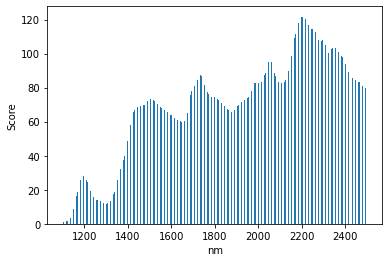

In [1083]:
# Selection of the most important independent variables (using correlation as parameter)
from sklearn.feature_selection import SelectKBest, f_regression

# calculation of the correlation scores
selection_c = SelectKBest(score_func=f_regression, k='all')
selection_c.fit(X_train, y_train)
plt.bar(X_train.columns.values, height=selection_c.scores_)
plt.xlabel('nm')
plt.ylabel('Score') ##related to f-statistic


In [1082]:
# Searching the number of features (ranked by correlation with y_ref) that have the best performance 
# !!! grid search is not performed, cross validation is not performed !!!
# SVR parameter found before are used
models = [
    LinearRegression(), 
    Ridge(), 
    # Lasso(), 
    SVR(C=Best_parameters_SVR.best_params_['C'], gamma=Best_parameters_SVR.best_params_['gamma']) 
    # RandomForestRegressor(), 
    # BaggingRegressor(), 
    # GradientBoostingRegressor(), 
    # StackingRegressor(estimators=[('ridge', Ridge()), ('svr', SVR_opt)])
    ]
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

## to save time, assume parameters found before for SVR are ok
best_k_per_model = {}
for model in models:
    # cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # takes tooo long
    selection_c = SelectKBest(score_func=f_regression)
    pipeline = Pipeline(steps = [('best', selection_c), ('lr', model)]) 
    param_kBest = {}
    param_kBest['best__k'] = [i for i in range(100, X.shape[1]+1, 50)]+[X.shape[1]] #from 100 to 700 with +100
    # cv set to None because takes a lot of time
    search_best = GridSearchCV(pipeline, param_kBest, scoring = 'neg_mean_squared_error', cv=None)
    results = search_best.fit(X,y)
    best_k_per_model[model] = results.best_params_['best__k'] # dict of best number of feautures for each model

# takes 34.3s

In [1084]:
best_k_per_model

{LinearRegression(): 150, Ridge(): 700, SVR(C=10000, gamma=0.1): 650}

In [1085]:
results_Kbest = {}
index = 0
for model in models:
    metrics = []
    selection_c = SelectKBest(score_func=f_regression, k=list(best_k_per_model.values())[index])
    index += 1
    selection_c.fit(X_train, y_train)
    X_train_selection_c = selection_c.transform(X_train) 
    X_test_selection_c = selection_c.transform(X_test)
    model.fit(X_train_selection_c, y_train)
    p_ = model.predict(X_test_selection_c)
    mae = mean_absolute_error(y_test, p_)
    mse = mean_squared_error(y_test, p_) 
    rmse = mean_squared_error(y_test, p_, squared=False) 
    r2_scors = r2_score(y_test, p_) 
    metrics.extend([mae, mse, rmse, r2_scors])
    results_Kbest[str(model)]=metrics

In [1086]:
results_search_Kbest = pd.DataFrame(results_Kbest, index=['MAE', 'MSE', 'RMSE',' R2_score'])
results_search_Kbest.to_latex(os.path.join(save_to_path,'models_k_best.tex'))

In [1113]:
# saving the model and doing the prediction
# !!! the model is trained again using the common wavelengths between training and validation data set 

import joblib 

print(joblib.__version__) # 1.0.1


# take note of the k-best wavelenghts selected  for the SVR model
selection_c = SelectKBest(score_func=f_regression, k=list(best_k_per_model.values())[2])
selection_c.fit(X_train, y_train)
cols_selected = selection_c.get_support(indices=True)
name_cols_selected = X_train.iloc[:,cols_selected].columns

# compare to the validation data set to find the common ones (comparision done exluding digits after comma)
to_eval = VAL_HSI.drop(['Unnamed: 0','Unnamed: 1'], axis=1)
eval_set = [int(i) for i in to_eval.columns] # here the digits are excluded
model_set = list(name_cols_selected)
New_feautures = list(set(eval_set).intersection(model_set))
print('{:} common wavelengths found (integer approximation) are {:}'.format(New_feautures, len(New_feautures)))
# get the common feautures to create another model so number of feautures in training and evaluation data is the same (assuming is not possible that evaluation and training set have different number of x)
new_training_CAL500 = CAL500[New_feautures]
# define the model parameter to grid search
param_SVR_new = {'C': [0.1, 1, 10, 100, 1000, 10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
              'kernel': ['rbf']}
SVR_opt_new = GridSearchCV(SVR(), param_SVR, refit=True, verbose=1)
# training the new model as before
X_train_comm, X_test_comm, y_train_comm, y_test_comm = train_test_split(new_training_CAL500, y, test_size=0.3, random_state=99)
print(X_train_comm.shape)
print(X_test_comm.shape)
print(y_train_comm.shape)
print(y_test_comm.shape)
# train again with common features using grid search 
SVR_opt_new.fit(X_train_comm, y_train_comm)
# save the model to disk
filename = os.path.join(current_path,'SVR_model.pkl')
joblib.dump(SVR_opt_new, filename)

# load the model to obtain predictions
load_model = joblib.load(filename)
# print score again
result = load_model.score(X_test_comm, y_test_comm)
print("The R2 of the new model = {:}".format(result))

1.0.1
[2054, 2060, 2066, 1564, 1570, 1576, 2098, 2104, 2110, 1608, 1614, 1620, 2142, 2148, 2154, 1652, 1658, 1664, 1162, 2186, 1168, 2192, 1174, 2198, 1696, 1702, 1708, 1206, 2230, 1212, 2236, 1218, 2242, 1224, 1740, 1746, 1752, 1758, 1250, 2274, 1256, 2280, 1262, 2286, 1268, 2292, 1784, 1790, 1796, 1802, 2318, 2324, 2330, 2336, 1828, 1834, 1840, 1846, 1338, 2362, 1344, 2368, 1350, 2374, 1356, 2380, 1872, 1878, 1884, 1890, 1382, 2406, 1388, 2412, 1394, 2418, 1400, 2424, 1916, 1922, 1928, 1934, 1426, 1432, 1438, 1444, 1960, 1966, 1972, 1978, 1470, 1476, 1482, 1488, 2004, 2010, 2016, 2022, 1520, 1526, 1532] common wavelengths found (integer approximation) are 101
(350, 101)
(150, 101)
(350,)
(150,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
The R2 of the new model = 0.9429066894275385


In [1116]:
# Create a copy (save time)
VAL_HSI_copy = VAL_HSI
# remove usless columns
VAL_HSI_copy = VAL_HSI_copy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
# change name of columns such as to have only integer part of the wavelength value
VAL_HSI_copy.columns = [int(i) for i in VAL_HSI_copy.columns]
# define a new evaluation set with common x between CAL_500 and VAL_HSI
eval_set = VAL_HSI_copy[New_feautures]
len(eval_set.columns)

101

In [1117]:
# now predict the final values (finals values are obtained averaging)
fin_val = load_model.predict(eval_set)
final_averaged_result = np.average(fin_val.reshape(400,80), axis=0)
final_averaged_result.shape

(80,)

In [1118]:
## write to file 
index = 0
with open(os.path.join(current_path,'Predictions_SalvatorePrioli.csv'), 'w') as outfile:
    for i in range(1,81):
            outfile.write("S{:03d}; {:0.6f}\n".format(i,final_averaged_result[index]))
            index+=1